# Historical Simple Algorithms

In [52]:
# all modules used in this notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import sys
sys.path.append('..')
from data_utils.preprocess import train_test_split, StandardScaler

# personal color pallete
c_ = {
    'red': '#ff6188',
    'orange': '#fc9867',
    'yellow': '#ffd866',
    'green': '#a8dd76',
    'blue': '#78dce8',
    'purple': '#ac9df2',
    'grey': '#2c2a2e',
    'white': '#fcfcfa',
    'black': '#211f22' 
}

# global params
matplotlib.rcParams['font.family'] = 'Arial'
plt.rcParams['figure.facecolor'] = c_['black']
plt.rcParams['axes.facecolor'] = c_['black']
plt.rcParams['text.color'] = c_['white']
plt.rcParams['axes.labelcolor'] = c_['white']
plt.rcParams['xtick.color'] = c_['white']
plt.rcParams['ytick.color'] = c_['white']


## Data Generation


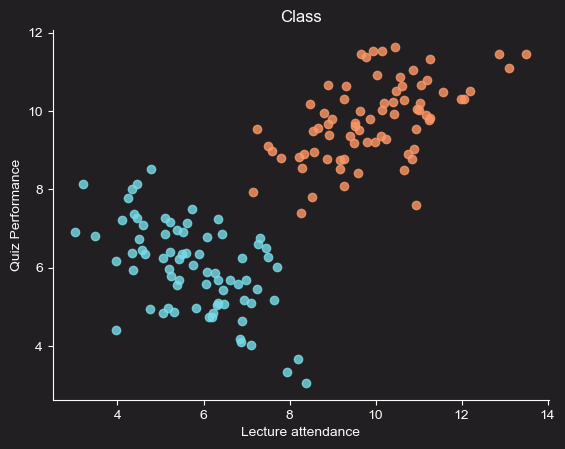

(150, 2)


In [53]:
SEED = 819
np.random.seed(SEED)

n_samples = 150
mean = [0, 0]    
cov = [[2, 0],    
       [0, 0.5]]
angle = 45 

data = np.random.multivariate_normal(mean, cov, int(n_samples/2))

theta = np.radians(angle)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])
theta += 5

rotation_matrix1 = np.array([[np.cos(theta), -np.sin(theta)],
                            [np.sin(theta), np.cos(theta)]])

rotated_data = data @ rotation_matrix
rotated_data1 = data @ rotation_matrix1
X = np.vstack([rotated_data + 6, rotated_data1 + 10])
y = np.vstack([np.zeros(int(n_samples/2)), np.ones(int(n_samples/2))]).flatten()

# Scatter plot
fig, ax = plt.subplots()
group = X[y == 0]
group1 = X[y == 1]
ax.scatter(group[:, 0], group[:, 1], alpha=0.8, c=c_['blue'])
ax.scatter(group1[:, 0], group1[:, 1], alpha=0.8, c=c_['orange'])
ax.set_title('Class')
ax.set_xlabel('Lecture attendance')
ax.set_ylabel('Quiz Performance')

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_['white'])
plt.show()
print(X.shape)

## Artificial Neurons

An **artificial neuron**, based on the McCulloch-Pitts (MCP) neuron model, takes a linear combination of input features $\vec{x}$ and corresponding weights $\vec{w}$:
$$z = \vec{w}^T\vec{x}$$
where $z$ is defined as the **net input**.

The decision function $\sigma(z)$ fires (output is 1) when $z$ is greater than a certain threshold $\theta$. It is defined as:
$$
\sigma(z) =
\begin{cases} 
1 & \text{if } z \ge \theta \\ 
0 & \text{otherwise}
\end{cases}
$$
 mimicking a neuron by treating it like a simple logic gate that either fires or stays inactive.

## The Perceptron

In 1957, Frank Rosenblatt published the first concept of the perceptron learning rule. It is simple yet elegant algorithm that makes inference using the artifical neuron.

#### Adjustment for implementation

Moving the threshold to the left,
$$z \ge \theta$$
$$z - \theta \ge 0$$
and including $b = -\theta$ to redfined the net input as:
$$z = \vec{w}^T\vec{x} + b$$
allows us to redfine the decision function as:
$$
\sigma(z) =
\begin{cases} 
1 & \text{if } z \ge 0 \\ 
0 & \text{otherwise}
\end{cases}
$$


In [54]:
def net_input(w, X, b):
    return X @ w + b

def predict(net_input):
    return np.where(net_input >= 0.0, 1.0, 0.0)

In [55]:
w_sample = [0.1, 0.5]
X_sample = X[0]
b_sample = -5
y_pred =predict(net_input(w_sample, X_sample, b_sample))
print (f'y_pred: {y_pred} | y_true: {y[0]}')

y_pred: 0.0 | y_true: 0.0


### Perceptron Learning Rule

The goal is the learn (adjust) the weight and bias unit values so that inference accuracy improves.
1. Initialize weights and bias unit to 0 or any small number
2. Make prediction & update weights and bias:
    $$\hat{y}^{(i)} = \sigma(z^{(i)})$$
    $$w_j := w_j + \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)}$$
    $$b := b + \eta(y^{(i)} - \hat{y}^{(i)})$$
3. Repeat step 2 until:
    * no more misclassification
    * minimum misclassification is met (if step a is impossible)
    * maximum epochs is met (if step b is not met)

    



In [66]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

scaler = StandardScaler(X)
X_train_scaled = scaler.scale(X_train)
X_test_scaled = scaler.scale(X_test)

In [101]:
w = np.random.uniform(low=0, high=1, size=X.shape[1])
b = np.random.uniform(low=0, high=1, size=1)
eta = 0.01
n_iter = 0
n_epochs = 5
X1 = X_train_scaled
while n_iter <= n_epochs:
    net_inputs = net_input(w, X1, b)
    y_pred = predict(net_inputs)
    y_error = y_train - y_pred
    
    if np.sum(np.abs(y_error)) == 0:
        break
    
    for i in range(X1.shape[0]):
        w[0] = w[0] + eta*(y_error[i])*X1[i, 0]
        w[1] = w[1] + eta*(y_error[i])*X1[i, 1]
        
 
print(f'learned | weights:{w}, bias unit:{b}') 
y_pred = predict(net_input(w, X_train_scaled, b))
print(f'training error: {np.sum(np.abs(y_train - y_pred))}/{y_train.shape[0]}')

learned | weights:[0.88486367 1.10386605], bias unit:[0.77074]
training error: 0.0/90


In [102]:
y_pred =predict(net_input(w, X_test_scaled, b))
print(f'{np.sum(np.abs(y_test - y_pred))}/{y_test.shape[0]}')

0.0/60


In [103]:
X_scaled = scaler.scale(X)

In [104]:
scaler.std

array([2.44363885, 2.17588   ])

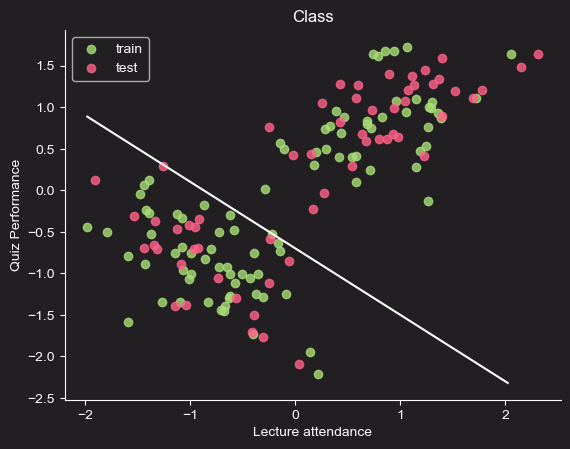

(150, 2)


In [107]:
X_scaled = scaler.scale(X)

# decision boundary
x_sample = np.arange(np.min(X_scaled[:, 0]), np.max(X_scaled[:, 0]))
x_2 = -(w[0]/w[1])*x_sample - (b/w[1])

# graph
fig, ax = plt.subplots()
group = X_train_scaled
group1 = X_test_scaled
ax.scatter(group[:, 0], group[:, 1], alpha=0.8, c=c_['green'], label='train')
ax.scatter(group1[:, 0], group1[:, 1], alpha=0.8, c=c_['red'], label='test')
ax.plot(x_sample, x_2, c=c_['white'])
ax.set_title('Class')
ax.set_xlabel('Lecture attendance')
ax.set_ylabel('Quiz Performance')

ax.spines[['top', 'right']].set_visible(False)
ax.spines[['bottom', 'left']].set_color(c_['white'])
ax.legend()
plt.show()
print(X.shape)